In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='gray_r')

In [43]:
# Transformation matrices
P = np.array([[0, 0, 0, 1],
              [1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0]])
Pstar = np.array([[0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1],
                  [1, 0, 0, 0]])


In [69]:
# real image
Mreal = np.array([[0, 0, 0, 0],
                  [0, 1, 1, 0],
                  [0, 1, 1, 0],
                  [0, 1, 1, 0]])
Mreal = np.ones((4,4)) - Mreal
# distorted image
Mmang = Mreal@P

# corrected input
Mstar = Mreal@Pstar

# np.linalg.det(Mreal)

Text(0.5,1,'Corrected visualization')

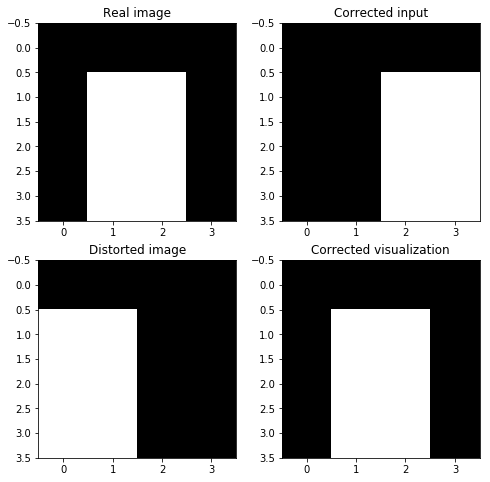

In [70]:
# plt.figure(1)
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=2) #, squeeze=True, sharey=True)
fig.set_size_inches(8,8)

plt.sca(ax1[0])
plt.imshow(Mreal)
plt.title("Real image")

plt.sca(ax2[0])
plt.imshow(Mmang)
plt.title("Distorted image")

plt.sca(ax1[1])
plt.imshow(Mstar)
plt.title("Corrected input")

plt.sca(ax2[1])
plt.imshow(Mstar@P)
plt.title("Corrected visualization")

In [131]:
# Define the randomization criteria
# proportions of one and zeros in the random matrices
cut = np.linspace(0.3,0.8,6)
nbpix = 4
nb_per_cut = 1000
cut

array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

In [132]:
np.random.choice([0, 1], size=(nbpix,nbpix), p=[ 1-cut[0], cut[0]])

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 0]])

In [133]:
# generating the dataset
Mreal_tab = np.zeros((len(cut)*nb_per_cut,nbpix,nbpix))
Mmang_tab = np.zeros((len(cut)*nb_per_cut,nbpix,nbpix))
Mstar_tab = np.zeros((len(cut)*nb_per_cut,nbpix,nbpix))
for cc in cut:
    ii = 0
    while ii < nb_per_cut:
        Mreal_tab[ii,:,:] = np.random.choice([0, 1], size=(nbpix,nbpix), p=[ 1-cc, cc])
        Mmang_tab[ii,:,:] = Mreal@P
        Mstar_tab[ii,:,:] = Mreal@Pstar
        ii += 1

In [130]:
type(Mreal_tab)
Mreal_tab.shape

(600, 4, 4)